# AI 2024 Online Summer Internship
### Name: Rasikh Ali
### Email: rasikhali1234@gmail.com

<div class="alert alert-block alert-info">
    <h1> Libraries </h1>
</div>

In [1]:
import re
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
import joblib
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\ABC\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\ABC\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\ABC\anaconda3\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


<div class="alert alert-block alert-info">
    <h1> Loading Dataset </h1>
</div>

In [2]:
data = pd.read_csv('emotion_prediction_dataset.csv', encoding='ISO-8859-1')

print("\n\nEmotion Prediction Dataset:")
print("============\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(f'Sample data count = {len(data)}\n')
print(data.head())
print(data.tail())



Emotion Prediction Dataset:

Sample data count = 100

                                               Tweet Emotion
0             False alarm // matoma &amp; Becky hill   anger
1  I'm tired of everybody telling me to chill out...   anger
2  Im so serious about putting words in my mouth ...   anger
3  Can someone make me a priority list of which t...   anger
4  @TeaPartyOrg Hes right when the Civil war star...   anger
                                                Tweet Emotion
95  Riggs dumb ass hell lolol #hilarious #LethalWe...   trust
96                        American Schools are lively   trust
97  Accept the challenges so that you can feel the...   trust
98  Have any of you ever stayed in hostels oversea...   trust
99  @ProSyndicate thanks for replying, I'm ironing...   trust


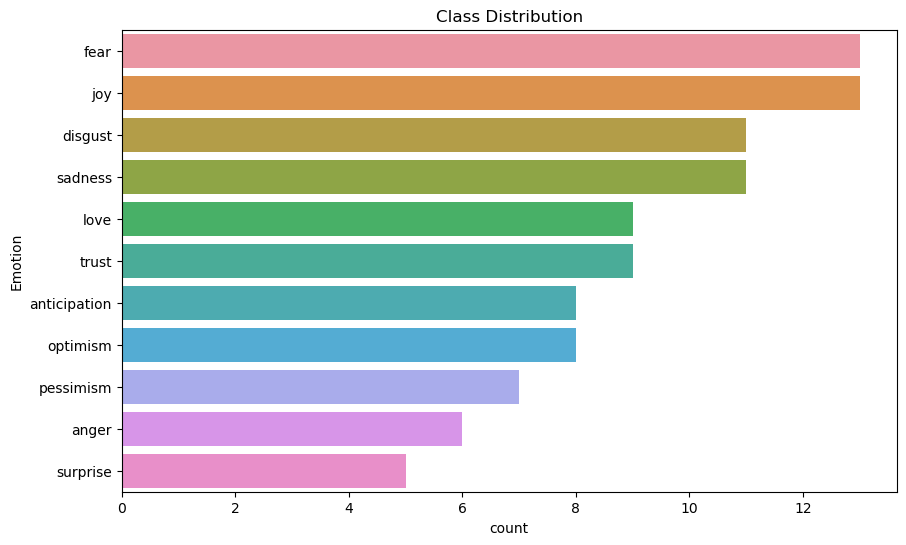

In [3]:
# Check class distribution
plt.figure(figsize=(10, 6))
sns.countplot(y='Emotion', data=data, order = data['Emotion'].value_counts().index)
plt.title('Class Distribution')
plt.show()

<div class="alert alert-block alert-warning">
    <h2> Display columns </h2>
</div>

In [4]:
data.columns

Index(['Tweet', 'Emotion'], dtype='object')

<div class="alert alert-block alert-warning">
    <h2> Keeping required columns in dataset </h2>
</div>

In [5]:
data = data[['Tweet', 'Emotion']]

<div class="alert alert-block alert-info">
    <h1> Understand and Pre-process Sample Data </h1>
</div>

<div class="alert alert-block alert-warning">
    <h2>  Download and set stopwords </h2>
    <p> # Ensure you have downloaded the stopwords
<br>import nltk
<br>nltk.download('stopwords')
<br>from nltk.corpus import stopwords

# Set the stopwords for English
stop_words = set(stopwords.words('english'))</p>
</div>

In [6]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ABC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<div class="alert alert-block alert-warning">
    <h2> Define function to clean the text </h2>
</div>

In [7]:
# Function to clean the text
def clean_text(text):
    # Remove symbols and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert text to lowercase
    text = text.lower()
    # Remove stop words
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

# Clean the 'Tweet' column
data['Tweet'] = data['Tweet'].apply(clean_text)

<div class="alert alert-block alert-warning">
    <h2> Drop NaN rows </h2>
</div>

In [8]:
# Sample data without Droping Rows with NAN Values
print(len(data))

100


In [9]:
print(data.isna().sum())

Tweet      0
Emotion    0
dtype: int64


In [10]:
# Drop rows with NaN values in the text column
data = data.dropna(subset=['Tweet'])

In [11]:
# Sample data After Droping Rows with NAN Values
print(len(data))

100


<div class="alert alert-block alert-warning">
    <h2> Data After Processing </h2>
</div>

In [12]:
print("\n\nEmotion Prediction Data After Preprocessing:")
print("=================================================\n")
pd.set_option("display.max_rows", None, "display.max_columns", None)

print(data.head())
print(data.tail())



Emotion Prediction Data After Preprocessing:

                                               Tweet Emotion
0                  false alarm matoma amp becky hill   anger
1  im tired everybody telling chill everythings o...   anger
2  im serious putting words mouth bitch dont add ...   anger
3  someone make priority list things outraged ord...   anger
4  teapartyorg hes right civil war starts wall wa...   anger
                                                Tweet Emotion
95   riggs dumb ass hell lolol hilarious lethalweapon   trust
96                            american schools lively   trust
97        accept challenges feel exhilaration victory   trust
98  ever stayed hostels overseas frame reference m...   trust
99  prosyndicate thanks replying im ironing shirt ...   trust


In [13]:
data

,Tweet,Emotion
0,false alarm matoma amp becky hill,anger
1,im tired everybody telling chill everythings o...,anger
2,im serious putting words mouth bitch dont add ...,anger
3,someone make priority list things outraged ord...,anger
4,teapartyorg hes right civil war starts wall wa...,anger
5,harboring osama bin laden relationship haqqani...,anger
6,tomorrow last episode despair arc much shit go...,anticipation
7,pastor feet away shooting victim protest says ...,anticipation
8,guys dating yet trans nervous blowjobs tfb dat...,anticipation
9,collects times minerva would chew cape begins ...,anticipation


<div class="alert alert-block alert-warning">
    <h2> Saving Cleaned Data </h2>
</div>

In [14]:
data.to_csv("cleaned_emotion_data.csv", index=False)

In [15]:
data.columns

Index(['Tweet', 'Emotion'], dtype='object')

<div class="alert alert-block alert-info">
    <h1> Splitting into Training and Testing </h1>
</div>

In [16]:
data = pd.read_csv('cleaned_emotion_data.csv')
X = data['Tweet']
y = data['Emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(len(X_train))
print(len(X_test))

80
20


In [18]:
X_train.head()

55    focus dont let others love define youre happy ...
88    ronaldo shocking hes tried skill twice hes nea...
26         andreasarahco actually heely campus bc scare
42    thank disney themed episode letting discover a...
69    jeremycorbyn magstogether god jeremycorbyn ful...
Name: Tweet, dtype: object

In [19]:
X_test.head()

83                    health think depression feel like
53    got asked hoco instagram dm bc someone lost be...
70                  mmmm im kinda sad hope shake school
45    ff nnthefamilyx nnsoul blues amp rock bandnnmu...
44    happy birthday lost lost dharmainitiative year...
Name: Tweet, dtype: object

<div class="alert alert-block alert-warning">
    <h2> Feature Extraction </h2>
</div>

In [20]:
# Initialize the TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=1000)

In [21]:
# Fit the vectorizer on the training data
vectorizer.fit(X_train)

TfidfVectorizer(max_features=1000)

In [22]:
# Transform the training data
X_train_tfidf = vectorizer.transform(X_train)

In [23]:
# Convert the TF-IDF sparse matrix to a DataFrame
X_train_tfidf_df = pd.DataFrame(X_train_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Features DataFrame:")
print(X_train_tfidf_df.head())


TF-IDF Features DataFrame:
   abortion  accept  accidentlyspillbeeronthecarpet  actually  add  \
0       0.0     0.0                             0.0  0.000000  0.0   
1       0.0     0.0                             0.0  0.000000  0.0   
2       0.0     0.0                             0.0  0.361508  0.0   
3       0.0     0.0                             0.0  0.000000  0.0   
4       0.0     0.0                             0.0  0.000000  0.0   

   affectionmore  afraid  ago  alert  allah  alottapain  also  amateurs  \
0            0.0     0.0  0.0    0.0    0.0         0.0   0.0       0.0   
1            0.0     0.0  0.0    0.0    0.0         0.0   0.0       0.0   
2            0.0     0.0  0.0    0.0    0.0         0.0   0.0       0.0   
3            0.0     0.0  0.0    0.0    0.0         0.0   0.0       0.0   
4            0.0     0.0  0.0    0.0    0.0         0.0   0.0       0.0   

    amazing  american  amp  andreasarahco  angle  animalrights  anxiety  \
0  0.000000       0.0  0.

In [24]:
# Transform the training data
X_test_tfidf = vectorizer.transform(X_test)

# Convert the TF-IDF sparse matrix to a DataFrame
X_test_tfidf_df = pd.DataFrame(X_test_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

print("\nTF-IDF Features DataFrame:")
print(X_test_tfidf_df.head())

#to do Parameter tuninng we are not clear how many features are optimal 


TF-IDF Features DataFrame:
   abortion  accept  accidentlyspillbeeronthecarpet  actually  add  \
0       0.0     0.0                             0.0       0.0  0.0   
1       0.0     0.0                             0.0       0.0  0.0   
2       0.0     0.0                             0.0       0.0  0.0   
3       0.0     0.0                             0.0       0.0  0.0   
4       0.0     0.0                             0.0       0.0  0.0   

   affectionmore  afraid  ago  alert  allah  alottapain  also  amateurs  \
0            0.0     0.0  0.0    0.0    0.0         0.0   0.0       0.0   
1            0.0     0.0  0.0    0.0    0.0         0.0   0.0       0.0   
2            0.0     0.0  0.0    0.0    0.0         0.0   0.0       0.0   
3            0.0     0.0  0.0    0.0    0.0         0.0   0.0       0.0   
4            0.0     0.0  0.0    0.0    0.0         0.0   0.0       0.0   

   amazing  american  amp  andreasarahco  angle  animalrights  anxiety  \
0      0.0       0.0  0.0 

<div class="alert alert-block alert-info">
    <h1> Training Phase </h1>
</div>

In [25]:
# Training the model
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

MultinomialNB()

In [26]:
# Save the model to disk
joblib.dump(model, 'naive_bayes_emotion_model.pkl')

# Save the vectorizer to disk
joblib.dump(vectorizer, 'tfidf_vectorizer_emotion.pkl')

['tfidf_vectorizer_emotion.pkl']

<div class="alert alert-block alert-info">
    <h1> Testing Phase </h1>
</div>

In [27]:
import joblib

# Load the model from disk
loaded_model = joblib.load('naive_bayes_emotion_model.pkl')

# Load the vectorizer from disk
loaded_vectorizer = joblib.load('tfidf_vectorizer_emotion.pkl')

print(f"Model loaded from 'naive_bayes_emotion_model.pkl'")

Model loaded from 'naive_bayes_emotion_model.pkl'


In [28]:
# Transform the test data using the loaded vectorizer
X_test_tfidf_loaded = loaded_vectorizer.transform(X_test)

# Evaluate the loaded model
y_pred_loaded = loaded_model.predict(X_test_tfidf_loaded)
accuracy_loaded = accuracy_score(y_test, y_pred_loaded)
report_loaded = classification_report(y_test, y_pred_loaded)

print(f"Accuracy: {accuracy_loaded}")
print("Classification Report:")
print(report_loaded)

Accuracy: 0.15
Classification Report:
              precision    recall  f1-score   support

       anger       0.00      0.00      0.00         2
anticipation       0.00      0.00      0.00         2
     disgust       0.33      0.50      0.40         2
        fear       0.17      0.33      0.22         3
         joy       0.33      0.33      0.33         3
        love       0.00      0.00      0.00         1
    optimism       0.00      0.00      0.00         0
   pessimism       0.00      0.00      0.00         2
     sadness       0.00      0.00      0.00         4
    surprise       0.00      0.00      0.00         1
       trust       0.00      0.00      0.00         0

    accuracy                           0.15        20
   macro avg       0.08      0.11      0.09        20
weighted avg       0.11      0.15      0.12        20



C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\ABC\anaconda3\lib\site-packages\sklearn\metrics\_classificat

Confusion Matrix:
[[0 0 0 1 0 1 0 0 0 0 0]
 [0 0 0 0 1 1 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0]
 [0 0 0 1 1 0 0 0 0 0 1]
 [0 0 0 2 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 2 0 0 0 0 0]
 [0 0 1 1 0 1 0 0 0 0 1]
 [0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0]]


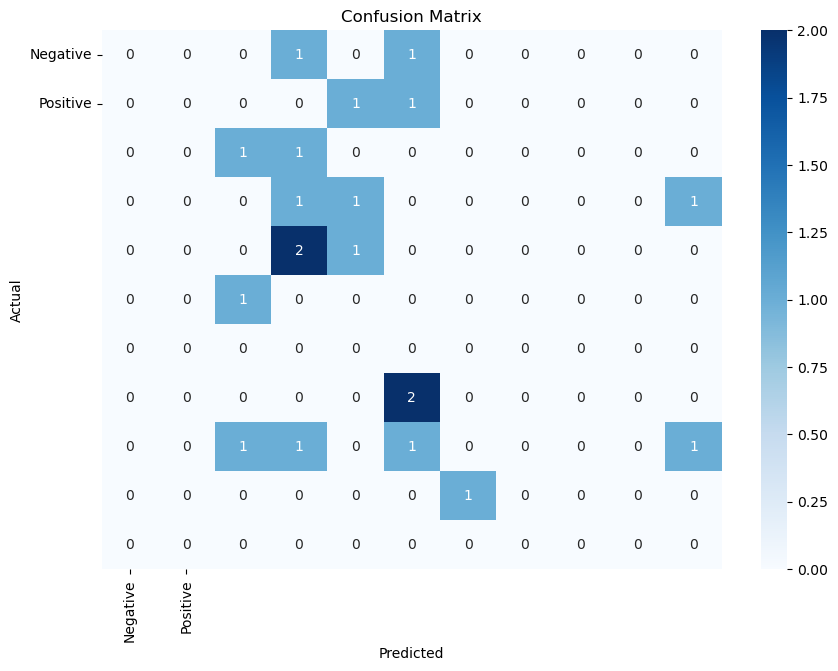

In [29]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_loaded)
print("Confusion Matrix:")
print(conf_matrix)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<div class="alert alert-block alert-info">
    <h1> Application Phase </h1>
</div>

In [30]:
# Take user input
user_input = input("Please enter your text: ").strip()

# Preprocess the user input
def preprocess_user_input(text):
    stop_words = set(stopwords.words('english'))
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    text = ' '.join(word for word in text.split() if word not in stop_words)
    return text

cleaned_input = preprocess_user_input(user_input)

Please enter your text: Hi, my name is Rasikh


In [31]:
# Transform the cleaned input using the vectorizer
user_input_tfidf = loaded_vectorizer.transform([cleaned_input])

# Predict the emotion of the user input
user_prediction = loaded_model.predict(user_input_tfidf)

# Output the prediction
print(f"The emotion of '{user_input}' is: {user_prediction[0]}")

The emotion of 'Hi, my name is Rasikh' is: fear
